In [1]:
import wfdb
import numpy as np
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
scipy: 1.7.3
matplotlib: 3.5.1
pandas: 1.4.2
sklearn: 1.0.2


In [2]:
record1 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0001')
record2 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0002')
record3 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0003')
record4 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0004')
record5 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0005')
record6 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0006')
record7 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0007')
record8 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0008')
record9 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0009')
record10 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0010')
record11 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0011')
record12 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0012')
record13 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0013')
record14 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0014')
record15 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0015')
record16 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0016')
record17 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0017')
record18 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0018')
record19 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0019')
record20 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0020')
record21 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0021')
record22 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0022')
record23 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0023')
record24 = wfdb.rdsamp('/Users/sanskritifarswal/Desktop/Challenge Data/a0024')



[350. 703. 599. ...  -2. -13. -13.]
[350. 703. 599. ...  -2. -13. -13.]
(71193,)


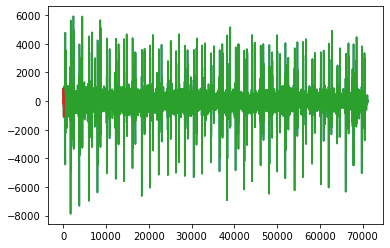

In [3]:
import matplotlib.pyplot as plt 
plt.plot(record4[0])
signal = record4[0]
print(signal[:,0])
plt.plot(signal[:,0])

signal2 = signal[:,0]
print(signal2)

signal3= np.asarray(signal2)
print(signal3.shape)

plt.plot(signal3[1:100])

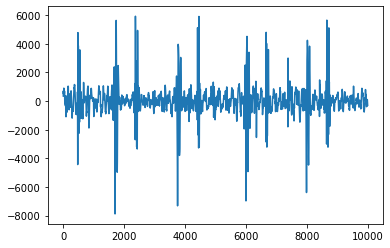

In [4]:
plt.plot(signal3[0:10000])

(71193, 2)


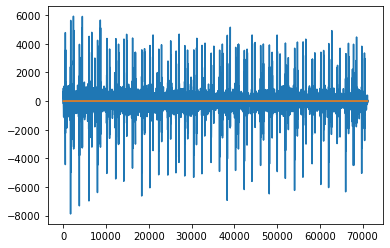

In [5]:
# Normalization
signal_normalised=signal-np.mean(signal)/np.std(signal)
plt.plot(signal_normalised)
print(signal.shape)


In [7]:
# periodgram of the original signal 
data = signal_normalised[:,0]

f1, Pxx_den1 = scipy.signal.periodogram(data, 2000,'flattop', scaling='spectrum')

plt.plot(f1[0:3000],Pxx_den1[0:3000])
print(f1.shape)

AttributeError: module 'scipy' has no attribute 'signal'

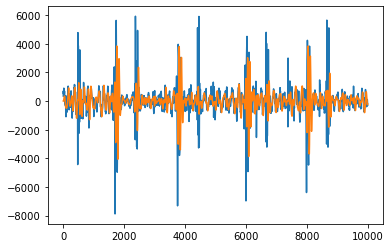

In [ ]:
#Filtering 
fs = 2000

b, a = scipy.signal.butter(3, [5, 30], 'band',fs=fs) 
filteredBandPass = scipy.signal.lfilter(b, a, data)
plt.plot(data[0:10000])
plt.plot(filteredBandPass[0:10000])


(35597,)


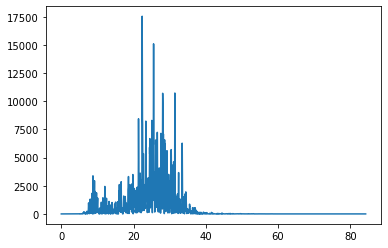

In [ ]:
# periodgram of the filtered signal 
data = filteredBandPass

f1, Pxx_den1 = scipy.signal.periodogram(data, 2000,'flattop', scaling='spectrum')

plt.plot(f1[0:3000],Pxx_den1[0:3000])
print(f1.shape)

In [ ]:
# normalisation : take the mean of the signal, subtract the mean from the signal, divide by standard deviation
# Find acceptable freq range for PCG signal and apply filtering
# plot only 10s of signals to be able to see the PCG shape
# fs=2000